<a href="https://www.kaggle.com/code/shubham128/emergency-classification?scriptVersionId=123657962" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
    #for filename in filenames:
        #print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv("/kaggle/input/emergencyvehicleclassification/Dataset/emergency_classification.csv")

In [4]:
data.shape

(2352, 2)

In [5]:
data.head(3)

,image_names,emergency_or_not
0,0.jpg,1
1,1.jpg,1
2,2.jpg,1


In [6]:
data['emergency_or_not'].value_counts()

0    1361
1     991
Name: emergency_or_not, dtype: int64

In [7]:
#storing image name in aray
Xo=[]
for img_name in data['image_names']:
    img=plt.imread("/kaggle/input/emergencyvehicleclassification/Dataset/images/"+img_name)
    Xo.append(img)
Xo=np.array(Xo)
Xo.shape

(2352, 224, 224, 3)

In [8]:
Y=data['emergency_or_not']

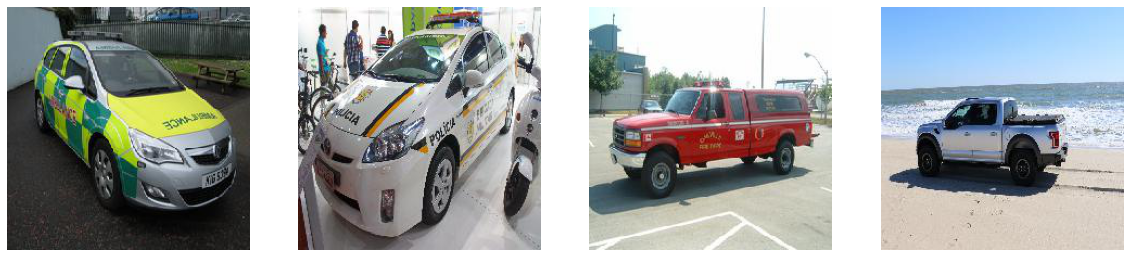

In [9]:
#visulaizing image
fig,ax = plt.subplots(nrows=1,ncols=4,figsize=(20,20))
for i in range(4):
    ax[i].imshow(Xo[i*400])
    ax[i].axis('off')
    

### Preprocessing the image

In [10]:
# Changing the shape of image i.e 3D into 2d
X=Xo.reshape(Xo.shape[0],224*224*3)
X.shape

(2352, 150528)

In [11]:
X.min(),X.max()

(0, 255)

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)
X_scaled.shape,X_scaled.min(),X_scaled.max()

((2352, 150528), 0.0, 1.0)

In [13]:
# normalizing the pixel values
#X = X / X.max()

In [14]:
X.max(),X.min()

(255, 0)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_valid, Y_train, Y_valid=train_test_split(X_scaled,Y,test_size=0.3, random_state=1)

In [16]:
X_train.shape,X_valid.shape,Y_train.shape,Y_valid.shape

((1646, 150528), (706, 150528), (1646,), (706,))

### Using Neural Networks

In [17]:
from keras.layers import Dense, InputLayer
from keras.models import Sequential

In [18]:
model=Sequential()
model.add(InputLayer(input_shape=X_train.shape[1]))
model.add(Dense(units=100,activation='sigmoid'))
model.add(Dense(units=100,activation='sigmoid'))
model.add(Dense(units=1,activation='sigmoid'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               15052900  
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 15,063,101
Trainable params: 15,063,101
Non-trainable params: 0
_________________________________________________________________


In [20]:
#compiling the model
model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [21]:
#training the model
model_history = model.fit(X_train, Y_train, epochs=50, batch_size=128,validation_data=(X_valid,Y_valid))

Epoch 1/50
13/13 [==============================] - 4s 271ms/step - loss: 0.6842 - accuracy: 0.5571 - val_loss: 0.6720 - val_accuracy: 0.5878
Epoch 2/50
13/13 [==============================] - 2s 171ms/step - loss: 0.6688 - accuracy: 0.5875 - val_loss: 0.6607 - val_accuracy: 0.5977
Epoch 3/50
13/13 [==============================] - 2s 172ms/step - loss: 0.6546 - accuracy: 0.6282 - val_loss: 0.6528 - val_accuracy: 0.6431
Epoch 4/50
13/13 [==============================] - 2s 172ms/step - loss: 0.6466 - accuracy: 0.6464 - val_loss: 0.6460 - val_accuracy: 0.6374
Epoch 5/50
13/13 [==============================] - 2s 169ms/step - loss: 0.6382 - accuracy: 0.6665 - val_loss: 0.6414 - val_accuracy: 0.6558
Epoch 6/50
13/13 [==============================] - 2s 172ms/step - loss: 0.6318 - accuracy: 0.6646 - val_loss: 0.6387 - val_accuracy: 0.6572
Epoch 7/50
13/13 [==============================] - 2s 173ms/step - loss: 0.6260 - accuracy: 0.6738 - val_loss: 0.6363 - val_accuracy: 0.6416
Epoch 

In [22]:

#predictions = model.predict(X_valid)
#predictions.reshape(-1,)
#classes_x=np.argmax(predictions,axis=1)

In [23]:
predict=(model.predict(X_valid)>0.5).astype(int)

In [24]:
predict[:10]

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0]])

In [25]:
prediction_int = predict >= 0.5
prediction_int = prediction_int.astype(int)

In [26]:
prediction_int[:10]

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0]])

In [27]:
np.where(predict==1)

(array([  1,   3,   8,  10,  11,  12,  14,  21,  25,  26,  28,  35,  37,
         39,  42,  43,  44,  48,  59,  60,  61,  64,  65,  70,  71,  72,
         78,  80,  82,  85,  90,  92,  94,  95, 100, 104, 106, 109, 113,
        115, 116, 119, 121, 127, 131, 132, 133, 135, 141, 146, 150, 151,
        152, 153, 154, 162, 163, 165, 167, 168, 179, 180, 181, 183, 185,
        186, 187, 188, 190, 191, 194, 196, 199, 201, 202, 203, 204, 206,
        207, 213, 217, 218, 221, 226, 227, 228, 230, 231, 237, 239, 246,
        247, 248, 252, 253, 255, 256, 266, 272, 273, 278, 283, 284, 286,
        287, 290, 291, 292, 293, 296, 301, 303, 305, 308, 309, 311, 312,
        313, 315, 317, 321, 324, 326, 332, 335, 336, 337, 341, 343, 345,
        346, 347, 348, 349, 350, 351, 353, 354, 356, 358, 360, 362, 364,
        365, 366, 368, 369, 371, 373, 374, 375, 377, 379, 380, 381, 382,
        384, 388, 390, 396, 400, 402, 404, 405, 408, 410, 413, 415, 417,
        418, 419, 422, 425, 427, 428, 430, 432, 434

In [28]:
from sklearn.metrics import accuracy_score
#print('Accuracy on validation set:', accuracy_score(Y_valid,classes_x), '%')
print('Accuracy on validation set:', accuracy_score(Y_valid,predict), '%')

Accuracy on validation set: 0.7039660056657224 %


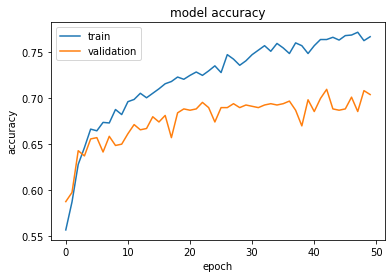

In [29]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

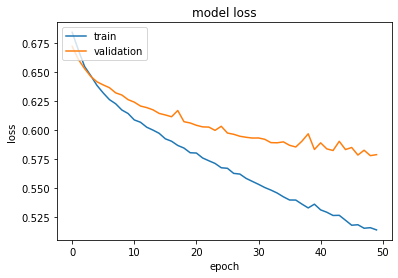

In [30]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Model is [100] % sure that it is emergency
And actual class is  0


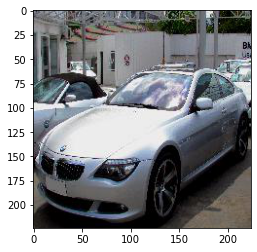

In [31]:
import random
# pull out the original images from the data which correspond to the validation data
_, valid_vehicles, _, valid_y = train_test_split(data.image_names.values, Y, test_size=0.3, random_state=12)

# get a random index to plot image randomly
index = np.random.choice(range(len(valid_vehicles)))



# get the corresponding image name and probability
img_name = valid_vehicles[index]
prob = (predict * 100).astype(int)[index]

# read the image
img = plt.imread("/kaggle/input/emergencyvehicleclassification/Dataset/images/"+img_name)

# print probability and actual class
print('Model is', prob , '% sure that it is emergency')
print('And actual class is ', valid_y.iloc[index])

# plot image
plt.imshow(img)

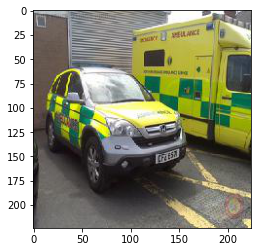

In [32]:
plt.imshow(Xo[93])

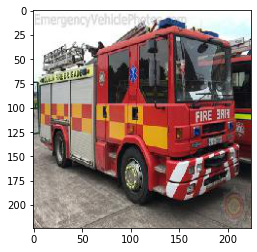

In [33]:
plt.imshow(Xo[106])